# Assignment: Classification of Handwritten Digits

In this assignment, we will use the $k$-nearest neighbour classifier and a dense neural network (multilayer perceptron) to classify handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/).



## Working together

The assignment should be solved in **groups of two**. Copying code from other students, the Internet, or other sources is not allowed (the provided helper code excluded). If you want to work alone, you must have a compelling reason (that convinces us) for doing so.

## Task

You are given a dataset of images of handwritten digits (0 through 9) and the correct answers to train your machine learning models on.

You need to divide the images into a training data set, (optionally) a validation data set, and a test set. You may also use cross-validation instead of a validation data set.

After training, and after selecting the proper hyper-parameters (the number of neighbors, $k$, the number of layers, the number of neurons, *etc.*), classify the images in the test set to see how accurately your models classify unknown images. **Note**: You should *never* use, look at, or classify the test set until you have selected your final model. You are *not* allowed to continue training or do any model alterations after you have evaluated your models on the test data set.

**In order to pass the assignment your solution must correctly classify at least 94 % of the *validation data set images* with the $k$-NN model and at least 97.7 % of the *validation data set images* with the neural network model.**

## What to hand in

You should hand in a complete and well-written report (in `pdf` format) together with your Jupyter notebook electronically in Labres. Only one member per group hands in and marks the other member. **Note**: you cannot change group members after the first hand-in, so make sure you do it correct the first time.

The report may be brief (try to keep it under 5 pages) but it is important that you fulfill the following requirements:

 * The report must have a title page including names and user names (@cs) for all group members, course name, and assignment name.
 * The report should be as short as possible and as long as necessary. If your report exceeds five pages (incl. the title page), chances are that you are doing something wrong.
 * Describe how your solution works on a level that does not lose interesting details. Divide the report into two parts (one for $k$-NN, the other for the neural network), and split each part into *implementation*, *results*, and *discussion* subsections.
   - Most important is that you describe how your solution works, and why you solved it in a particular way. Clearly state the ranges for your hyper-parameters, and explain why you chose those.
   - Explain, and give pseudo-code for your hyper-parameter search. Explain any decisions/choices you've made.
   - For the neural network: Plot how the loss evolve during training of your best model, and interpret the plot. The loss is available in the `MLPClassifier` after training.
   - Describe how your work went and which problems and issues you faced when developing the program.
   - Describe how you divided the work between you.
   - Use clear, well written English language.
   - You must not include your source code in the report, supply it in the Jupyter notebook.
   - **Report your validation scores in the report.**

The source code should align to the following:

 * Comment the code in a reasonable way. Follow the [Docstring conventions](https://peps.python.org/pep-0257/).
 * Structure your code in a suitable way, such that it is easy to follow what is going on.
 * Name classes, variables, methods, modules, *etc.*, such that the names clearly describe their function and follow the specifications given above.
 * The code you hand in should not contain sections that are not used, or unnecessary. Make sure that you understand every part of the code that you hand in.
 * **Important:** hand in a notebook that contains your execution results, i.e., execute the notebook from scratch (**Kernel** - **Re-start and run all**) and save before you hand in.

(0.0, 12.835503845255062, 12.942854035804041, 15.28156305586402, 16.460695902002506, 16.903360735825814, 17.34445399900928, 17.51789065654819, 18.12224534213443, 18.197201290894796, 18.26386050027792, 19.242481959700587, 19.301777840695532, 19.41434530099523, 19.424882083423437, 19.430398445988516, 20.954693058171575, 21.12338029703305, 21.6616060640822, 22.36889056754387, 22.779691223091284, 23.50275467183818, 23.561340950224814, 24.81075264670982, 24.861033721670974, 25.309846090662734, 25.580666096184988, 25.770423046208155, 25.798152949941887, 26.2715698146788, 26.273829070345027, 26.675958498996945, 27.206914486324667, 27.310040575839007, 28.239220220555918, 28.699028775501983, 28.922012206417214, 29.23644840873465, 29.254256447649265, 29.55041306014339, 31.572917995386746, 32.35274296894808, 32.66119268957052, 33.244787047445044, 33.47915018555358, 35.33890364035942, 35.45237640144598, 36.53384829997628, 37.66012604126362, 40.060661152185155)
(array([ 0. ## Getting started

You can follow [these instructions](https://jupyter.org/install) to install Jupyter Notebook. Then, proceed as follows:

 - Download this notebook.
 - Start Jupyter Notebook
 - Open your saved copy of this notebook

Alternatively, you can also use [Google Colab](https://colab.research.google.com/) to work on the assignment "in the cloud".

**Note**: If you take the course Artificial Intelligence in Cognitive Science (5DV201), then set the following variable to `False`:



In [10]:
course_5DV124 = True

In [11]:
%%capture
# Install the dependencies (in case you use Google Colab, these should be available by default, though)
! pip install -Iv numpy matplotlib sklearn==0.24.1 --user 

In [12]:
import numpy as np
np.random.seed(42)  # Set the random seed for reproducible results

In [13]:
# Load the MNIST dataset (this may take a while)

import sklearn.datasets

data = sklearn.datasets.fetch_openml("mnist_784")

print(data.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [36]:
# Split the data into training, (validation), and test set

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(data.data, data.target, test_size=0.25, random_state=1)
Xtrain =  np.asarray(Xtrain)
Xtest =  np.asarray(Xtest)
ytrain =  np.asarray(ytrain)
ytest =  np.asarray(ytest)

# Note! Do not touch the test data until the very end!

print(f"Training set size X   : {Xtrain.shape}")
print(f"Training set size y   : {ytrain.shape}")
print(f"Test set size X       : {Xtest.shape}")
print(f"Test set size y       : {ytest.shape}")
print(f"Output classes        : {set(ytrain)}")

Training set size X   : (52500, 784)
Training set size y   : (52500,)
Test set size X       : (17500, 784)
Test set size y       : (17500,)
Output classes        : {'4', '3', '5', '8', '6', '7', '9', '2', '0', '1'}


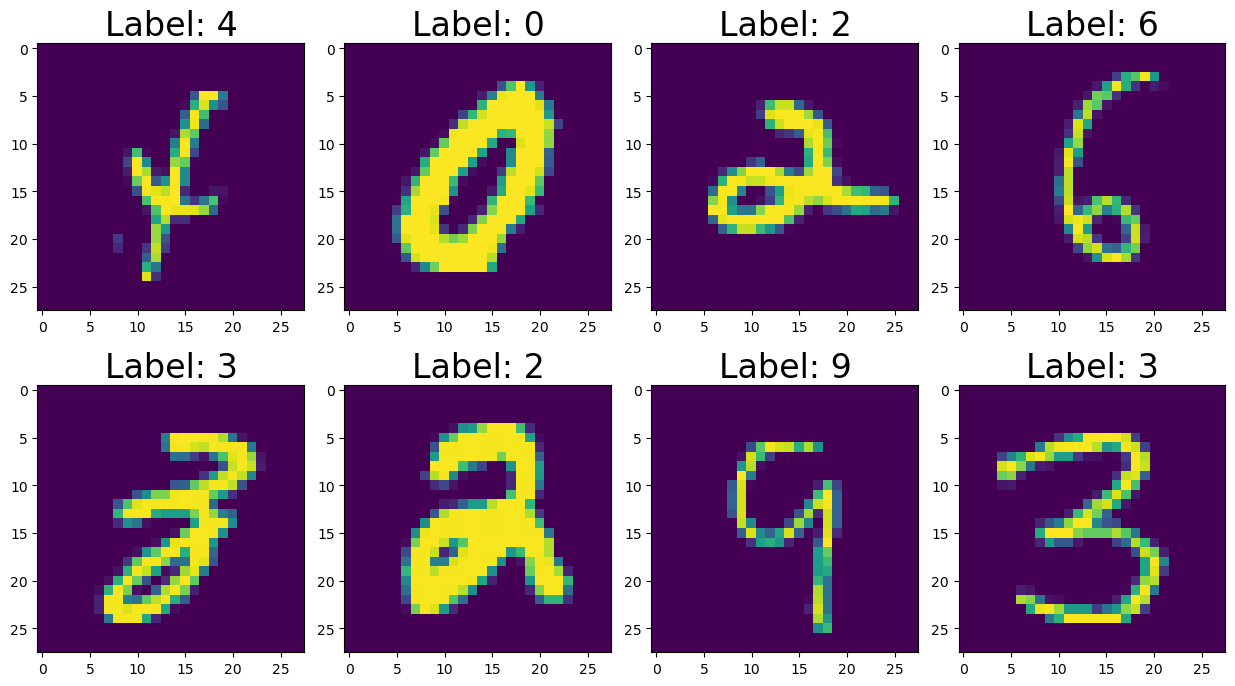

In [37]:
# Plot a few images

import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 7.75))
fig.subplots_adjust(top=0.995,
                    bottom=0.115,
                    left=0.005,
                    right=0.995,
                    wspace=0.15,
                    hspace=0.005)

plot_array = (2, 4)
ax = [[None] * plot_array[1]] * plot_array[0]
it = 0
for i in range(plot_array[0]):
    for j in range(plot_array[1]):
        ax[i][j] = plt.subplot2grid((2, 4), (i, j), rowspan=1, colspan=1)
        ax[i][j].imshow(Xtrain[it, :].reshape((28, 28)))
        ax[i][j].set_title(f"Label: {ytrain[it]}", fontsize=24)
        it += 1

In [38]:
# Preprocess the data

import sklearn.preprocessing

print(f"Before preprocessing, test data       : "
      f"min = {np.min(Xtrain):.1f}, "
      f"max = {np.max(Xtrain):.1f}, "
      f"mean = {np.mean(Xtrain):.1f}, "
      f"std = {np.std(Xtrain):.1f}")

print(f"Before preprocessing, test data       : "
      f"min = {np.min(Xtest):.1f}, "
      f"max = {np.max(Xtest):.1f}, "
      f"mean = {np.mean(Xtest):.1f}, "
      f"std = {np.std(Xtest):.1f}")

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(Xtrain)  # Every statistic we compute is found on the training data!

Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

print(f"After preprocessing, test data        : "
      f"min = {np.min(Xtrain):.1f}, "
      f"max = {np.max(Xtrain):.1f}, "
      f"mean = {np.mean(Xtrain):.1f}, "
      f"std = {np.std(Xtrain):.1f}")

print(f"After preprocessing, test data        : "
      f"min = {np.min(Xtest):.1f}, "
      f"max = {np.max(Xtest):.1f}, "
      f"mean = {np.mean(Xtest):.1f}, "
      f"std = {np.std(Xtest):.1f}")

Before preprocessing, test data       : min = 0.0, max = 255.0, mean = 33.4, std = 78.7
Before preprocessing, test data       : min = 0.0, max = 255.0, mean = 33.3, std = 78.5
After preprocessing, test data        : min = -1.3, max = 229.1, mean = 0.0, std = 1.0
After preprocessing, test data        : min = -1.3, max = 1211.1, mean = -0.0, std = 1.0


### The $k$-NN model

If you take the course **5DV124**, then you will have to implement the $k$-NN classifier yourself. The below implementation uses the scikit-learn implementation of the $k$-NN classifier, but you need to do it yourself.

If you take the course **5DV201**, then you can use the $k$-NN classifier from scikit-learn directly. You are of course free to also implement the $k$-NN classifier yourself, if you want to do that.

In both cases, you need to perform a hyper-parameter search for the optimal number of neighbours, $k$.

In [39]:
# Create the k-NN classifier

import sklearn.neighbors
import statistics
from statistics import mode

class KNeighborsClassifier(sklearn.neighbors.KNeighborsClassifier):

    def __init__(self, n_neighbors=5):
        self.k = n_neighbors

    def fit(self, X, y):
        """ Fit model data

        Keyword arguments:
        X = Training data
        y = Training classification data
        """
        self.X = X
        self.y = y

    def predict(self, X):
        """ Predict class (number) for provided test data.
        returns list of predictions

        Keyword arguments:
        X = List of test sample data to predict
        """
        predictions = np.zeros((len(X),), dtype=object)

        for i in range(len(X)):
            predictions[i] = self.classify(X[i])
        
        return predictions
    
    def classify(self, x):
        """ Predict a class (number) for provided one test sample.
        returns predicted number

        Keyword arguments:
        x = Test sample data to predict
        """
        distances = []
        for i in range(len(self.X)):
            dist = np.linalg.norm(x - self.X[i])
            distances.append(dist)
        
        a, b = zip(*sorted(zip(distances, self.y.copy())))
        k_first = b[0:self.k]

        # This beautifull line of code converts a float in string format to an integer and then back to a string format.
        # So '5.0f' -> 5 -> '5'
        return str(int(mode(k_first)))


In [49]:
# Define cross validation functions

def cross_validate(
  model = None,
  nr_of_folds = 5,
  x_data = None,
  y_data = None,
  ):
  """ Perform cross validation on a model and return the average score for all folds
  Return validation score

  Keyword arguments:
  model -- the real part (default 0.0)
  nr_of_folds -- How many folds to split the data into
  x_data = Training data
  y_data = Training classifiactions
  """

  # Validate input data
  assert model != None, "Invalid model"
  assert len(x_data) == len(y_data), f"Invalid data size - x data: {len(x_data)}, y data: {len(y_data)}"
  assert (nr_of_folds > 2 and nr_of_folds <= len(x_data)), f"Invalid nr of folds: {nr_of_folds}"

  global scaler
  validation_score = 0

  x_folds = np.split(x_data.copy(), nr_of_folds)
  y_folds = np.split(y_data.copy(), nr_of_folds)

  # Loop over all folds and perform cross validation for each of them.
  for i in range(nr_of_folds):
    cross_test_x = np.zeros([0, 2])
    cross_test_y = np.zeros([0, 2])
    cross_val_x = np.zeros([0, 2])
    cross_val_y = np.zeros([0, 2])
    
    # Create all folds.
    for j, (fold_x, fold_y) in enumerate(zip(x_folds, y_folds)):
      if i == j:
        cross_val_x = fold_x
        cross_val_y = fold_y
      else:
        # Fill test data
        if not cross_test_x.any():
          cross_test_x = fold_x
          cross_test_y = fold_y
        else:
          cross_test_x = np.concatenate((cross_test_x, fold_x))
          cross_test_y = np.concatenate((cross_test_y, fold_y))

    
    cross_test_x = scaler.transform(cross_test_x)

    model.fit(cross_test_x, cross_test_y)
    validation_score = validation_score + model.score(cross_val_x, cross_val_y)

    return validation_score / nr_of_folds



In [55]:
# Perform cross validation for k-NN

from numpy import ndarray

n = 10000
max_k = 20

errs_val = np.zeros(max_k)

for k in range(1, max_k):
  print(f"k={k}", end="..")

  knn_crossval = KNeighborsClassifier(n_neighbors=k)
  errs_val[k] = cross_validate(model = knn_crossval, x_data = Xtrain[:n], y_data = ytrain[:n])

  print(f"score={errs_val[k]:.3f}", end=" ")

best_score = np.amax(errs_val)
k_best = np.where(errs_val == best_score)[0][0]
print(f"\nCross validation done! Best k = {k_best} with score {best_score}")


k=1..score=0.129 k=2..score=0.129 k=3..score=0.139 k=4..score=0.147 k=5..score=0.146 k=6..score=0.147 k=7..score=0.151 k=8..score=0.152 k=9..score=0.151 k=10..score=0.152 k=11..score=0.150 k=12..score=0.153 k=13..score=0.154 k=14..score=0.153 k=15..score=0.151 k=16..score=0.154 k=17..score=0.154 k=18..score=0.151 k=19..score=0.151 
Cross validation done! Best k = 13 with score 0.154


[0.    0.129 0.129 0.139 0.147 0.146 0.147 0.151 0.152 0.151 0.152 0.15
 0.153 0.154 0.153 0.151 0.154 0.154 0.151 0.151]


Text(0, 0.5, 'Validation Accuracy')

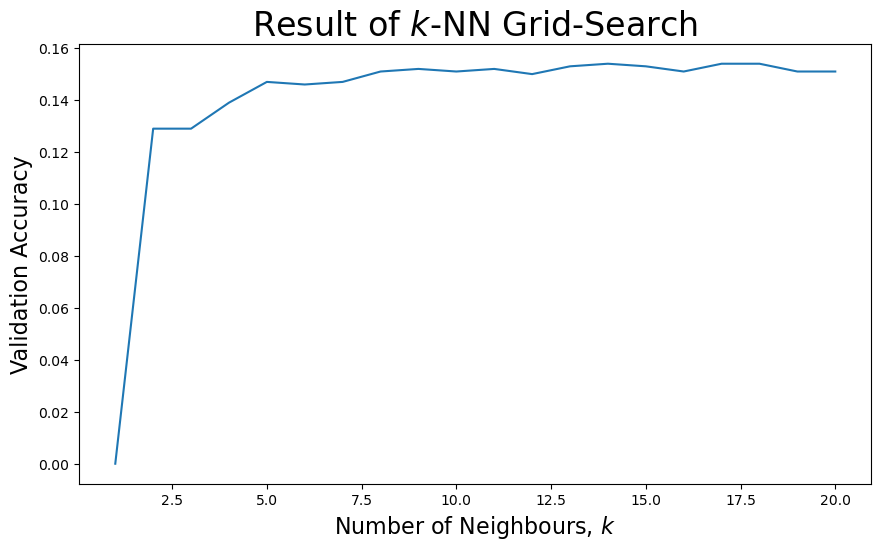

In [56]:
# Plot the accuracy curve as a function of k

print(errs_val)
fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust(top=0.995,
                    bottom=0.115,
                    left=0.005,
                    right=0.995,
                    wspace=0.15,
                    hspace=0.005)

ax0 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)
ax0.plot(range(1, len(errs_val) + 1), errs_val)
ax0.set_title("Result of $k$-NN Grid-Search", fontsize=24)
ax0.set_xlabel("Number of Neighbours, $k$", fontsize=16)
ax0.set_ylabel("Validation Accuracy", fontsize=16)

In [57]:
# Train the final k-NN model with the best value for k

model_knn = KNeighborsClassifier(n_neighbors=k_best)
model_knn.fit(Xtrain, ytrain)

KeyboardInterrupt: 

### The neural network model

We will use the neural networks (multilayer perceptrons) implemented in scikit-learn. You need to find the optimal number of layers, the number of neurons in each of the layers, and any other hyper-parameters that may be relevant.

In [58]:
# Create the NN classifier

import sklearn.neural_network

n = 1000

hidden_layer_1_settings = [100, 120, 140, 160, 180, 200]
hidden_layer_2_settings = [100, 120, 140, 160, 180, 200]
hidden_layer_3_settings = [0, 100, 150, 200]
alpha_settings = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]
learning_rate_init_settings = [0.001, 0.002, 0.003, 0.004, 0.005]

# This creates a list of all possible setting permutations
permutations = [[i, j, k, l, m] for i in hidden_layer_1_settings 
                 for j in hidden_layer_2_settings
                 for k in hidden_layer_3_settings
                 for l in alpha_settings
                 for m in learning_rate_init_settings]

best_setting = []
best_score = 0

for i, setting in enumerate(permutations):

    if setting[2] == 0:
        hidden_layer_sizes = (setting[0], setting[1])
    else:
        hidden_layer_sizes = (setting[0], setting[1], setting[2])

    model = sklearn.neural_network.MLPClassifier(
        hidden_layer_sizes = hidden_layer_sizes,
        activation = 'relu',
        alpha = setting[3],
        batch_size = 'auto',
        learning_rate_init = setting[4],
        max_iter = 200,
    )

    score = cross_validate(model = model, x_data = Xtrain[:n], y_data = ytrain[:n])

    if score > best_score:
        best_score = score
        best_setting = setting

print(f"Cross validation complete! Best setting: {best_setting} res: {best_score}")

Cross validation complete! Best setting: [200, 200, 200, 0.0004, 0.001] res: 0.09


In [59]:
# Train the final model using the best settings

if best_setting[2] == 0:
    hidden_layer_sizes_best = (best_setting[0], best_setting[1])
else:
    hidden_layer_sizes_best = (best_setting[0], best_setting[1], best_setting[2])

model_ann = sklearn.neural_network.MLPClassifier(
    hidden_layer_sizes = hidden_layer_sizes_best,
    alpha = best_setting[3],
    batch_size = 'auto',
    learning_rate_init = best_setting[4],
    max_iter = 200,
)

model_ann.fit(Xtrain, ytrain)

/usr/lib/python3/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:587: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(alpha=0.0004, hidden_layer_sizes=(200, 200, 200))

Once we have selected our final model, we can compute the test error on the final models as the last thing we do. Make sure to only do this at the very end, after you have selected the best models you can find.

In [ ]:
# Evaluate the final model on all the data sets, including the test data. We
# only evaluate the test data once, and as the last thing we do. If you train
# another model after this, based on the performance on the test data, then your
# test data is effectively a validation dataset, and you no longer have a test
# dataset. (Or, if you keep your test data set, then your results are biased and
# by that unreliable.)
print(f"k-NN model training data accuracy  : {model_knn.score(Xtrain, ytrain)}")
print(f"k-NN model test data accuracy      : {model_knn.score(Xtest, ytest)}")

print(f"ANN model training data accuracy   : {model_ann.score(Xtrain, ytrain)}")
print(f"ANN model test data accuracy       : {model_ann.score(Xtest, ytest)}")
